<a href="https://colab.research.google.com/github/Bajanar3/Bottribe-A.I/blob/master/Copy_of_Battleship_Mya_Poject_1For_Showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
class Arena:
    def __init__(self, size, *args, **kwargs):
        self.size = size
        self.game_lib = {   'cruiser': [1, 1, 1, 1, 1],
                            'destroyer': [1,1,1],
                            'frigate': [1,1,1,1],
                            'patrol boat': [1,1]
                        }
        #self.battlefield = np.zeros(shape=(self.size,self.size))
        return

    def dimension(self):
        if self.size > max([len(i) for i in self.game_lib.values()]):
            self.battlefield = np.zeros(shape=(self.size,self.size))
        else:
            print("Battlefield is too small. Battlefield cannot be less than cruiser size.")
            self.battlefield = np.zeros(shape=(10,10))
        return self.battlefield

    def mine_field(self):
        for _ in range(20):
            x = np.random.randint(0,self.size)
            y = np.random.randint(0,self.size)
            self.battlefield.itemset((x, y), 2)
        return self.battlefield

    def set_board(self, ship, orientation, bow_coordinates, *args, **kwargs):
        self.orientation = orientation
        self.ship = ship
        self.x, self.y = bow_coordinates
        try:
            if self.ship in self.game_lib:
                ship_size = self.game_lib.get(self.ship)

            if self.orientation in ["horizontal"]:
                for i in range(len(ship_size)):
                    self.battlefield.itemset((self.x, self.y + i), 1) #sets the item at the position of the array to the value 1
           
            if self.orientation in ["vertical"]:
                for i in range(len(ship_size)):
                    self.battlefield.itemset((self.x + i, self.y), 1)
        except IndexError: #this is a specific exception for when the index is exceeded.
            print("Ship placement out of bounds")
        self.battlefield = self.battlefield
        return self.battlefield

    def __call__(self):
        return self.battlefield
    pass
    

In [ ]:
def showgame(game_board):
    
    font_dict={
    "family":"serif",
    "weight": "bold",
    "size": "20"
    }
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,15), facecolor="lightblue")
    plt.title( label=("OCEAN WAR"), fontdict=font_dict, pad=20)
    plt.grid(b=True, which='both')
    plt.imshow(game_board, cmap="Blues")

In [ ]:
arena = Arena(10)
arena.dimension()
arena.mine_field()

for _ in range(5):
    ship = input("Available ships: cruiser, frigate, destroyer, patrol boat\n\nSelect ship type: ")
    orientation = input("Orientation on the battlefield: ")
    x = input("X_coordinates of the bow of the ship: ")
    y = input("Y_coordinates of the bow of the ship: ")
    game_board = arena.set_board(ship=str(ship), orientation=str(orientation), bow_coordinates=( int(x), int(y) ))
#game_board


Available ships: cruiser, frigate, destroyer, patrol boat

Select ship type: cruiser
Orientation on the battlefield: vertical
X_coordinates of the bow of the ship: 0
Y_coordinates of the bow of the ship: 0
Available ships: cruiser, frigate, destroyer, patrol boat

Select ship type: patrol boat
Orientation on the battlefield: 4
X_coordinates of the bow of the ship: 2
Y_coordinates of the bow of the ship: 3
Available ships: cruiser, frigate, destroyer, patrol boat

Select ship type: patrol boat
Orientation on the battlefield: horizontal
X_coordinates of the bow of the ship: 8
Y_coordinates of the bow of the ship: 0
Available ships: cruiser, frigate, destroyer, patrol boat

Select ship type: destroyer
Orientation on the battlefield: horizontal
X_coordinates of the bow of the ship: 5
Y_coordinates of the bow of the ship: 3
Available ships: cruiser, frigate, destroyer, patrol boat

Select ship type: patrol boat
Orientation on the battlefield: vertical
X_coordinates of the bow of the ship: 0

In [ ]:
new_turn = input("Would you like to play Battleship by Mya? ")
while new_turn in ["y", "yes"]:
    X = input("X value ")   
    Y = input("Y value ")

    status = game_board[int(X), int(Y)]
    if int(status)==1:
        print("KABOOM!")
        game_board.itemset((int(X),int(Y)), 0)
    elif int(status)==2:
        print("MINE HIT!")
        break
    elif int(status)==0:
        print("YOU MISSED!")    
    new_turn = input("Ready to fire?")
showgame(game_board)

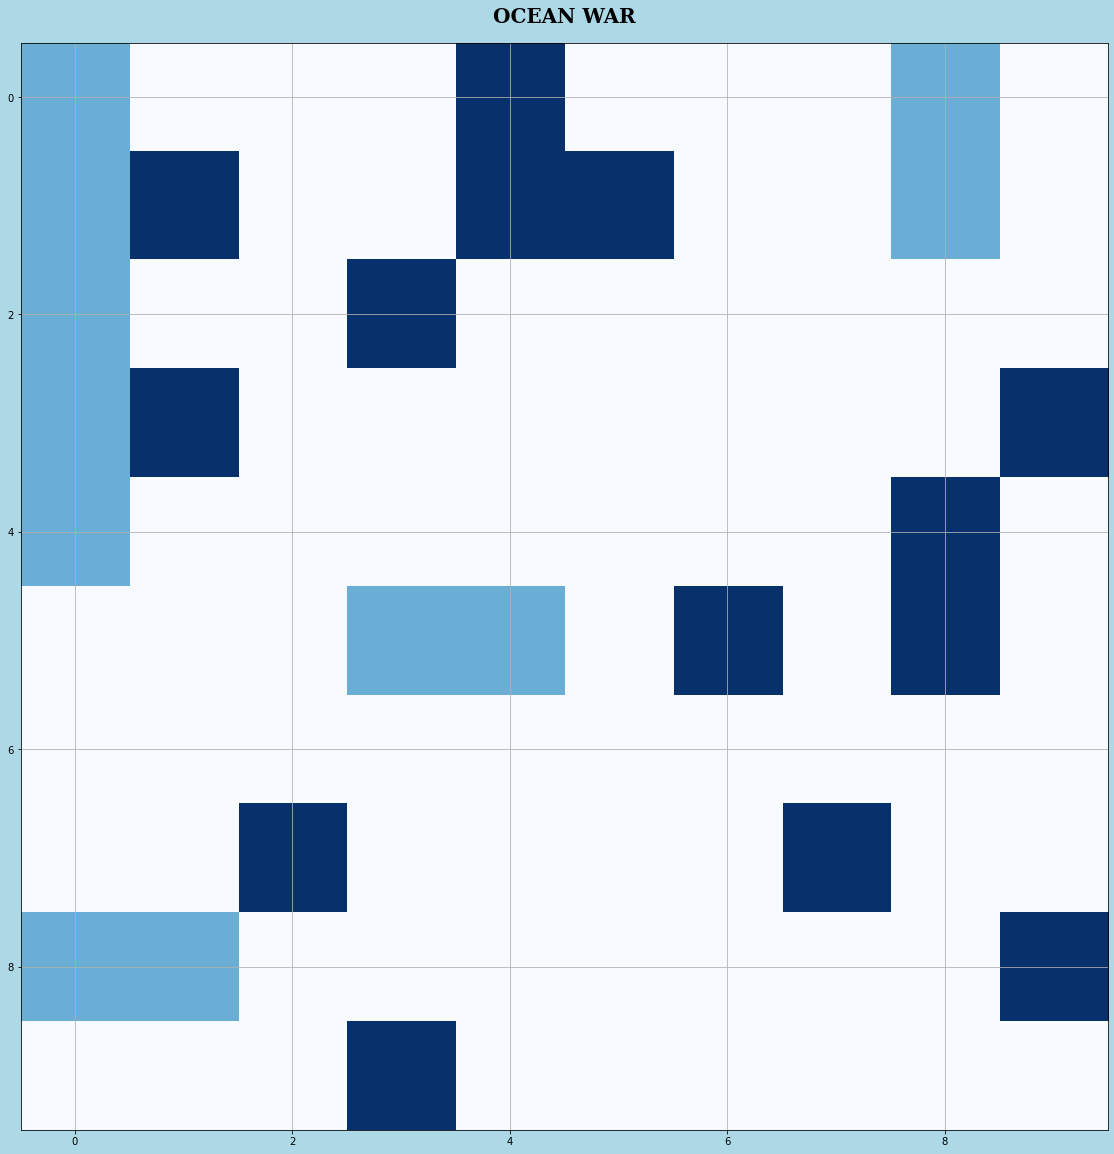

In [ ]:
showgame(game_board)